<a href="https://colab.research.google.com/github/2303A51553/Natural-language-process/blob/main/2303A51553_b09_nlp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [9]:
df=pd.read_csv('/content/bbc_news.csv')

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [12]:
text=df['description']
print("description:\n",text)

description:
 0        The Ukrainian president says the country will ...
1        Jeremy Bowen was on the frontline in Irpin, as...
2        One of the world's biggest fertiliser firms sa...
3        The parents of the Manchester Arena bombing's ...
4        Consumers are feeling the impact of higher ene...
                               ...                        
25202    A court hears about the pain of Ashling Murphy...
25203    The clip sees Tennant crashing his Tardis at t...
25204    A police officer "immediately engaged and shot...
25205    It has stirred an extraordinary level of criti...
25206    Dale Houghton is given a 12-week suspended jai...
Name: description, Length: 25207, dtype: object


In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string

In [14]:
#lowercasing
import re
def preprocess_text(text):
  text=text.lower()
  #remove punctuation
  text=text.translate(str.maketrans('','',string.punctuation))
  text=re.sub(r'[^a-zA-Z0-9\s]',"",text)
  tokens=word_tokenize(text)
  #remove stopwords
  stop_words=set(stopwords.words('english'))
  tokens=[word for word in tokens if word not in stop_words]
  #remove punctuation
  return " ".join(tokens)
  #Apply preprocessing
df["cleaned_text"]=df['description'].astype(str).apply(preprocess_text)
print(df["cleaned_text"])

0        ukrainian president says country forgive forge...
1        jeremy bowen frontline irpin residents came ru...
2        one worlds biggest fertiliser firms says confl...
3        parents manchester arena bombings youngest vic...
4        consumers feeling impact higher energy costs f...
                               ...                        
25202    court hears pain ashling murphys mother sister...
25203    clip sees tennant crashing tardis genesis dale...
25204    police officer immediately engaged shot suspec...
25205    stirred extraordinary level criticism within p...
25206       dale houghton given 12week suspended jail term
Name: cleaned_text, Length: 25207, dtype: object


In [15]:
print(df)

                                                   title  \
0      Ukraine: Angry Zelensky vows to punish Russian...   
1      War in Ukraine: Taking cover in a town under a...   
2             Ukraine war 'catastrophic for global food'   
3      Manchester Arena bombing: Saffie Roussos's par...   
4      Ukraine conflict: Oil price soars to highest l...   
...                                                  ...   
25202  Ashling Murphy: Victim impact statements from ...   
25203  David Tennant returns as Doctor Who for Childr...   
25204  One killed in New Hampshire psychiatric hospit...   
25205  Biden facing growing internal dissent over Isr...   
25206  Bradley Lowery: Sheffield Wednesday fan senten...   

                             pubDate  \
0      Mon, 07 Mar 2022 08:01:56 GMT   
1      Sun, 06 Mar 2022 22:49:58 GMT   
2      Mon, 07 Mar 2022 00:14:42 GMT   
3      Mon, 07 Mar 2022 00:05:40 GMT   
4      Mon, 07 Mar 2022 08:15:53 GMT   
...                              ...   

In [16]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df["cleaned_text"])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 274949 stored elements and shape (25207, 27823)>
  Coords	Values
  (0, 25873)	1
  (0, 19588)	1
  (0, 21964)	1
  (0, 6495)	1
  (0, 10333)	1
  (0, 10331)	1
  (0, 16972)	1
  (0, 5518)	1
  (1, 13570)	1
  (1, 4138)	1
  (1, 10564)	1
  (1, 13310)	1
  (1, 21038)	1
  (1, 4744)	1
  (1, 21669)	1
  (1, 9996)	1
  (1, 25664)	1
  (1, 10151)	1
  (2, 21964)	1
  (2, 17925)	1
  (2, 27467)	1
  (2, 3688)	1
  (2, 9836)	1
  (2, 10019)	1
  (2, 6087)	1
  :	:
  (25203, 24639)	1
  (25203, 6905)	1
  (25204, 2850)	1
  (25204, 22764)	1
  (25204, 19249)	1
  (25204, 9535)	1
  (25204, 12721)	1
  (25204, 17808)	1
  (25204, 24390)	1
  (25204, 8838)	1
  (25204, 6042)	1
  (25205, 27364)	1
  (25205, 19591)	1
  (25205, 9469)	1
  (25205, 6680)	1
  (25205, 14799)	1
  (25205, 23892)	1
  (25205, 1603)	1
  (25206, 24394)	1
  (25206, 11003)	1
  (25206, 13443)	1
  (25206, 24835)	1
  (25206, 12436)	1
  (25206, 159)	1
  (25206, 6904)	1


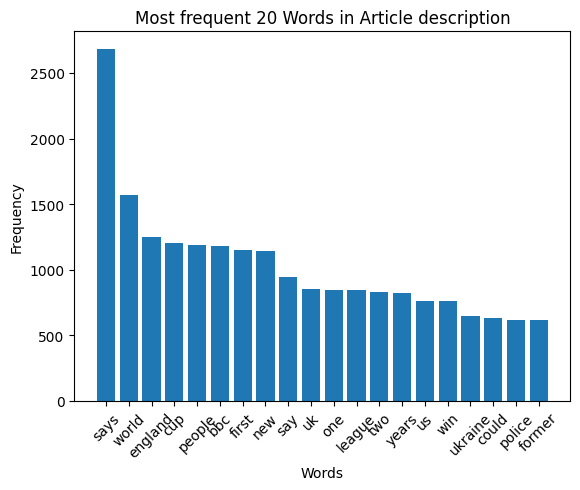

In [17]:
import matplotlib.pyplot as plt
allwords=" ".join(df["cleaned_text"]).split()
# Count words one by one
wordfreq={}
for word in allwords:
    if word in wordfreq:
        wordfreq[word]+=1
    else:
        wordfreq[word]=1
sorted_words=sorted(wordfreq.items(),key=lambda x:x[1],reverse=True)[:20]
words=[w for w, c in sorted_words]
counts=[c for w, c in sorted_words]
plt.bar(words,counts)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most frequent 20 Words in Article description")
plt.show()

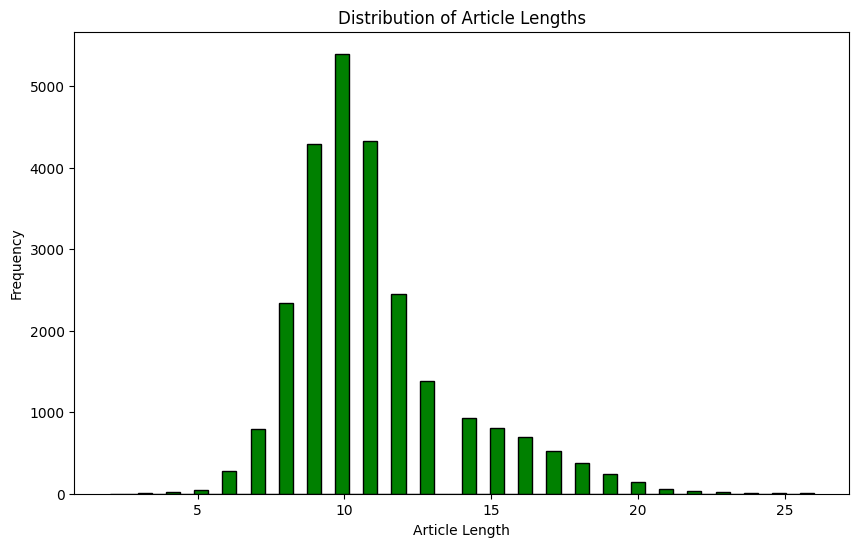

In [20]:
df['article_length']=df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
plt.hist(df['article_length'],bins=50,color='green',edgecolor='black')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Distribution of Article Lengths')
plt.show()